## Explorative Data  Analysis of images
**Data Source**: kaggle.com: https://www.kaggle.com/c/severstal-steel-defect-detection/overview <br>
**Company**: Severstal: https://en.wikipedia.org/wiki/Severstal; https://www.severstal.com/eng/about/

**Data Description**: <br>
Images of dimension 3 x 1600 x 256, with informations about the presence of the defect, its type (*multiple chips on the surface/Single vertical cracks/Multiple vertical cracks/Multiple large surface patches*) and the location of it. <br>

**EDA Results**: <br>
Defects of type three seems not to adhere to a single geometric. They can either be multiple vertical lines or multiple cricle/chips (like defects of class 1)

### 1. Requirments

In [1]:
### a) Import pck as acronym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### b) Import pck
import torch
import cv2
import os
import sys
sys.path.append('\\'.join(os.getcwd().split('\\')[:-1])+'\\src')

### c) From pck import Class
from torchvision import transforms, models
from torch.utils.data import dataloader
from tqdm import tqdm


### d) From custom.pck import custom.Class
from dataset import SteelDataset, Resize

### 2. Parameters

In [2]:
### PSEUDO-FIXED PARAMS
METADATA_PATH = '../data/data.csv'
IMAGES_PATH = '../data/train_images'

LABEL_MULTI = ['No Defect', 'Type 1', 'Type 2', 'Type 3', 'Type 4']   

size = mask_size = (64, 400)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
batch_size = 1000

### 3. Load data

In [3]:
### 3.1 Define transforms.Compose
img_transform = transforms.Compose([transforms.Resize(size = size), transforms.ToTensor(),
                                      transforms.Normalize(mean = mean, std = std)])
mask_transform = transforms.Compose([Resize(size = (size[1], size[0]))])

In [4]:
### 3.2 Retrieve datasets
dataset = SteelDataset(metadata_root= METADATA_PATH, 
                       image_root = IMAGES_PATH, 
                       transform = img_transform, 
                       mask_transform = mask_transform)
### 3.3 Get dataloders
data = dataloader.DataLoader(dataset, batch_size = batch_size, num_workers=4)

### 4. Load batch

In [5]:
### 4.1 Define colors for each type of defect (Cyan, Red, Green, Blue)
colors = [[0, 0.25, 0.25], [0.25, 0.0, 0.0], [0.0, 0.25, 0.0], [0.0, 0.0, 0.25]]

### 4.2 Retrieve the batch
for batch in data:
    break

### 5. Distribution of retrieved batch

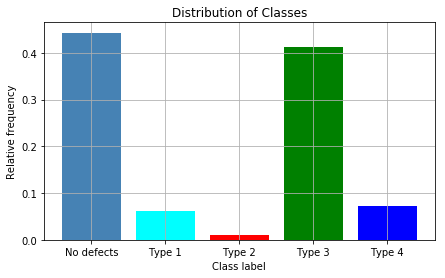

In [6]:
### 4.3 Plot distributions of classes
fig = plt.figure(figsize=(7, 4))
vc = pd.Series(batch[1]['label'].numpy()).value_counts().sort_index()
plt.bar(['No defects', 'Type 1', 'Type 2', 'Type 3', 'Type 4'], vc/vc.sum(),
         color=['steelblue', 'cyan', 'red', 'green', 'blue'])
plt.grid()
plt.title('Distribution of Classes')
plt.xlabel('Class label')
plt.ylabel('Relative frequency')
plt.show()

### 6. Separate example by target

In [7]:
X0 = batch[0][batch[1]['label'] == 0][:10]
Y0 = batch[1]['label'][batch[1]['label'] == 0][:10]
M0 = batch[1]['mask'][batch[1]['label'] == 0]

X1 = batch[0][batch[1]['label'] == 1][:10]
Y1 = batch[1]['label'][batch[1]['label'] == 1][:10]
M1 = batch[1]['mask'][batch[1]['label'] == 1][:10]

X2 = batch[0][batch[1]['label'] == 2][:10]
Y2 = batch[1]['label'][batch[1]['label'] == 2][:10]
M2 = batch[1]['mask'][batch[1]['label'] == 2][:10]

X3 = batch[0][batch[1]['label'] == 3][:10]
Y3 = batch[1]['label'][batch[1]['label'] == 3][:10]
M3 = batch[1]['mask'][batch[1]['label'] == 3][:10]

X4 = batch[0][batch[1]['label'] == 4][:10]
Y4 = batch[1]['label'][batch[1]['label'] == 4][:10]
M4 = batch[1]['mask'][batch[1]['label'] == 4][:10]

### 7. Visualize sample images

In [8]:
def plot_img(X, Y, M, ax):                                                        
    img = np.transpose(X.numpy(), (1, 2, 0))*std + mean                   ### Convert tensor to a reshaped numpy array  
    mask = M.numpy().reshape(size[0], size[1])                            ### Convert the mask tensor to a reshaped numpy array

    ### 4.5 Display example
    img[mask == 1] = img[mask == 1] + colors[Y - 1]                       ### Set mask over image
    ax.imshow(img)                                                        ### Display image with mask

#### 7.a) No Defects

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


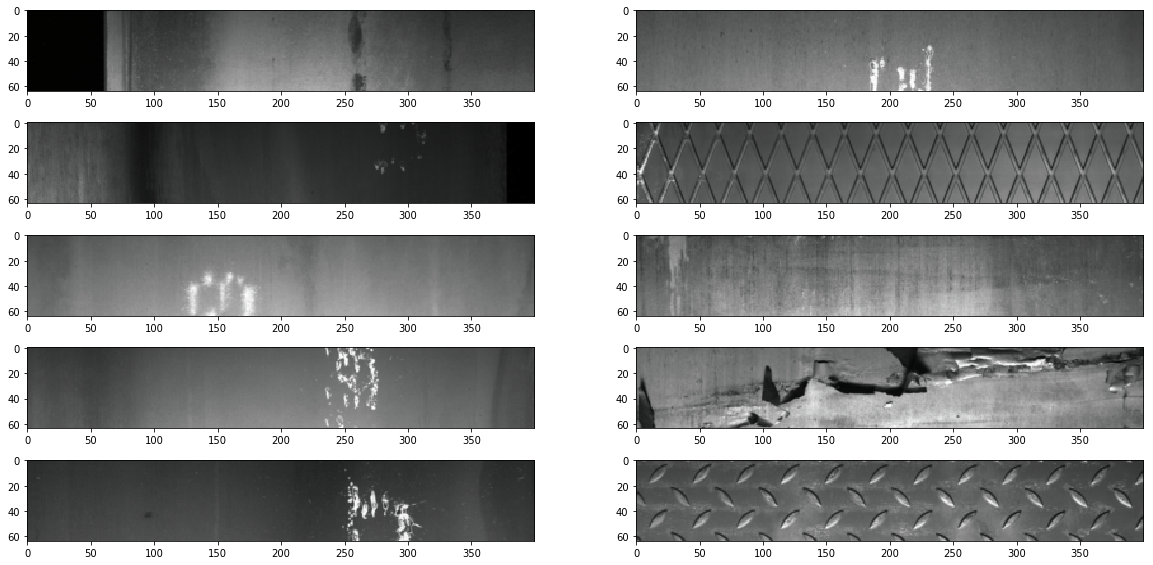

In [9]:
fig, ax = plt.subplots(5, 2, figsize=(20, 10))
for i in range(5):
    for j in range(2):
        plot_img(X0[i*2 + j], Y0[i*2 + j], M0[i*2 + j], ax[i, j])        
plt.show()

### 7.b) Type 1 Defects

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


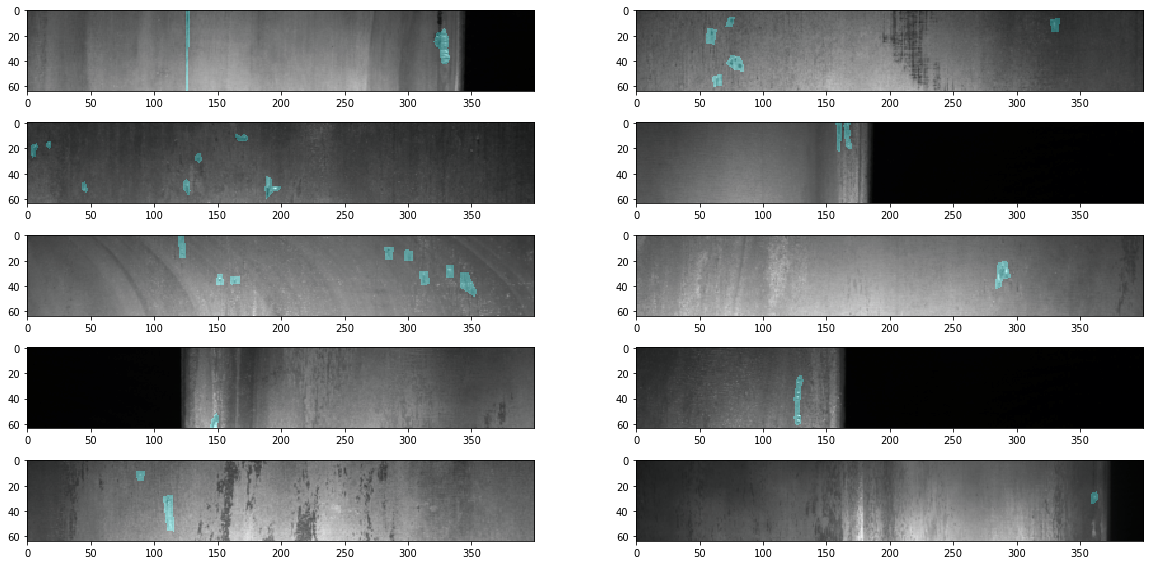

In [10]:
fig, ax = plt.subplots(5, 2, figsize=(20, 10))
for i in range(5):
    for j in range(2):
        plot_img(X1[i*2 + j], Y1[i*2 + j], M1[i*2 + j], ax[i, j])        
plt.show()

### 7.c) Type 2 Defects

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


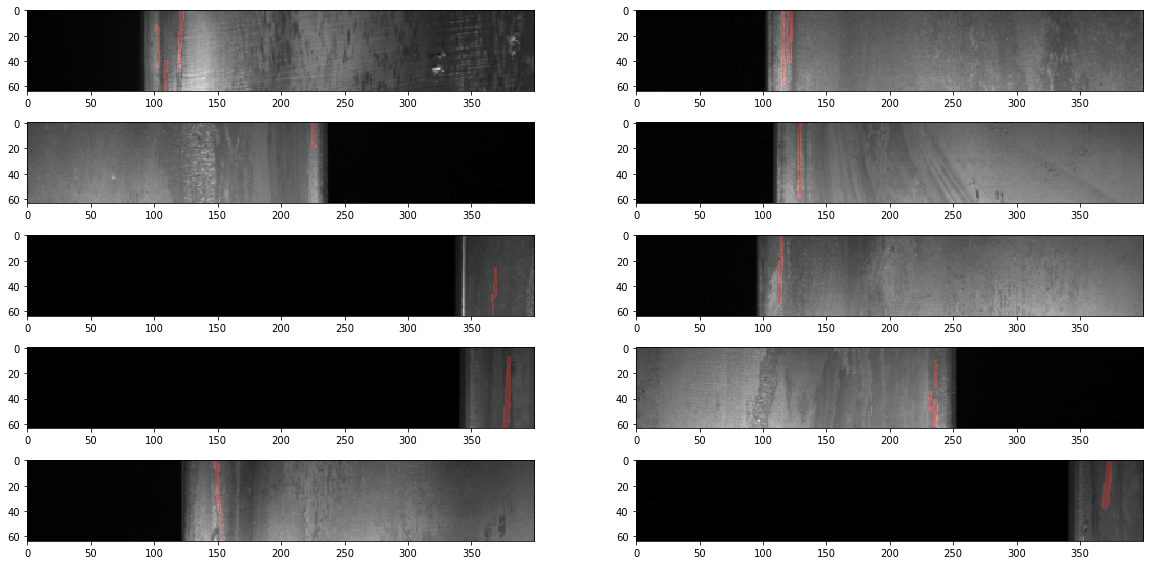

In [11]:
fig, ax = plt.subplots(5, 2, figsize=(20, 10))
for i in range(5):
    for j in range(2):
        plot_img(X2[i*2 + j], Y2[i*2 + j], M2[i*2 + j], ax[i, j])        
plt.show()

### 7.d) Type 3 Defects

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


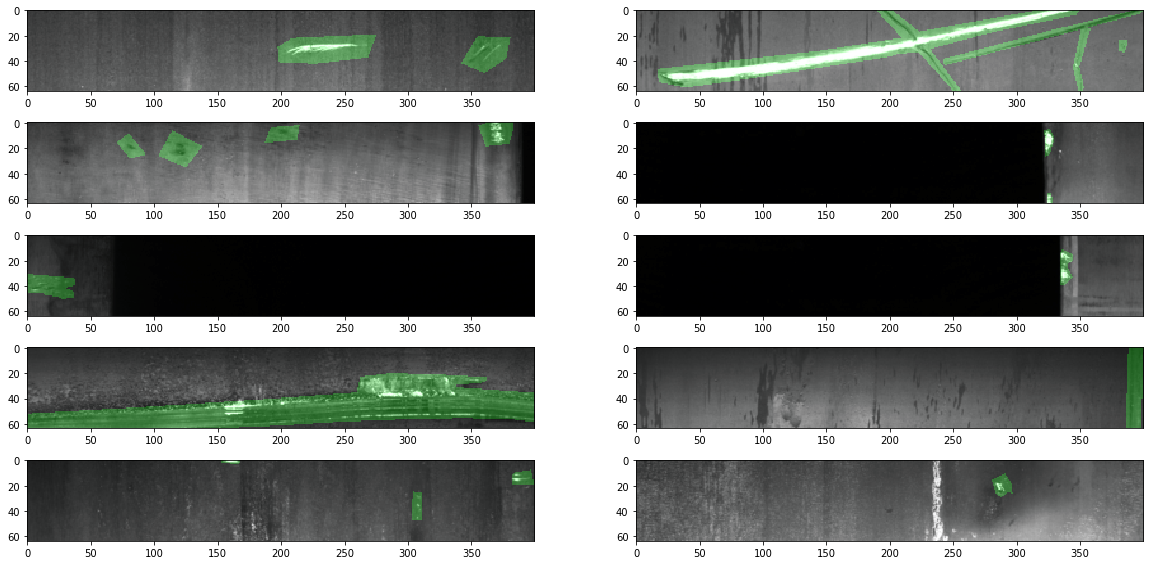

In [12]:
fig, ax = plt.subplots(5, 2, figsize=(20, 10))
for i in range(5):
    for j in range(2):
        plot_img(X3[i*2 + j], Y3[i*2 + j], M3[i*2 + j], ax[i, j])        
plt.show()

### 7.e) Type 4 Defects

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


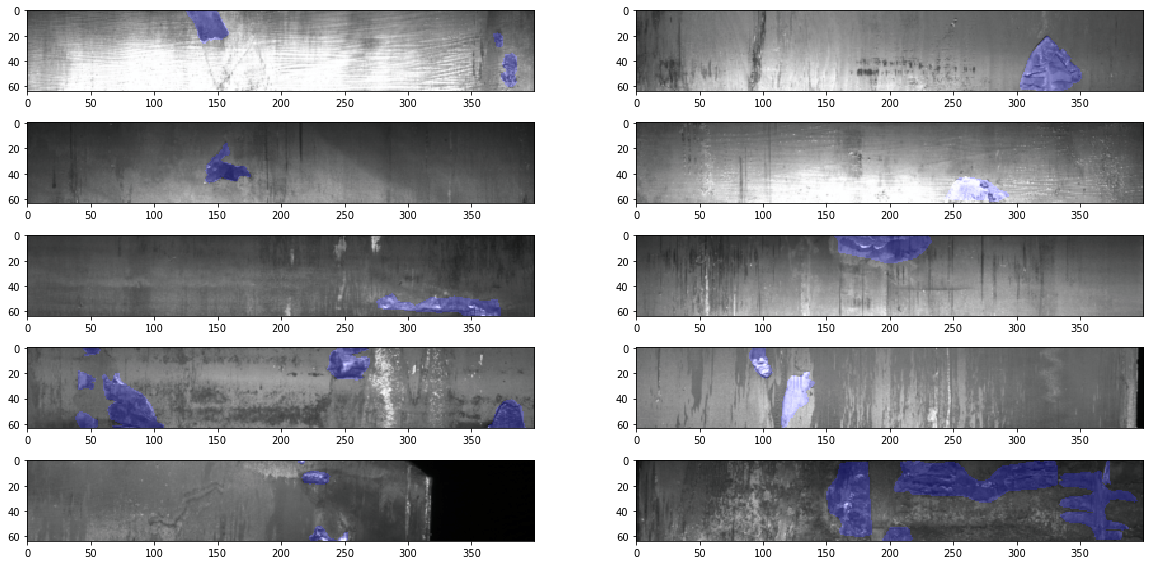

In [13]:
fig, ax = plt.subplots(5, 2, figsize=(20, 10))
for i in range(5):
    for j in range(2):
        plot_img(X4[i*2 + j], Y4[i*2 + j], M4[i*2 + j], ax[i, j])        
plt.show()

### 8) Summary of images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


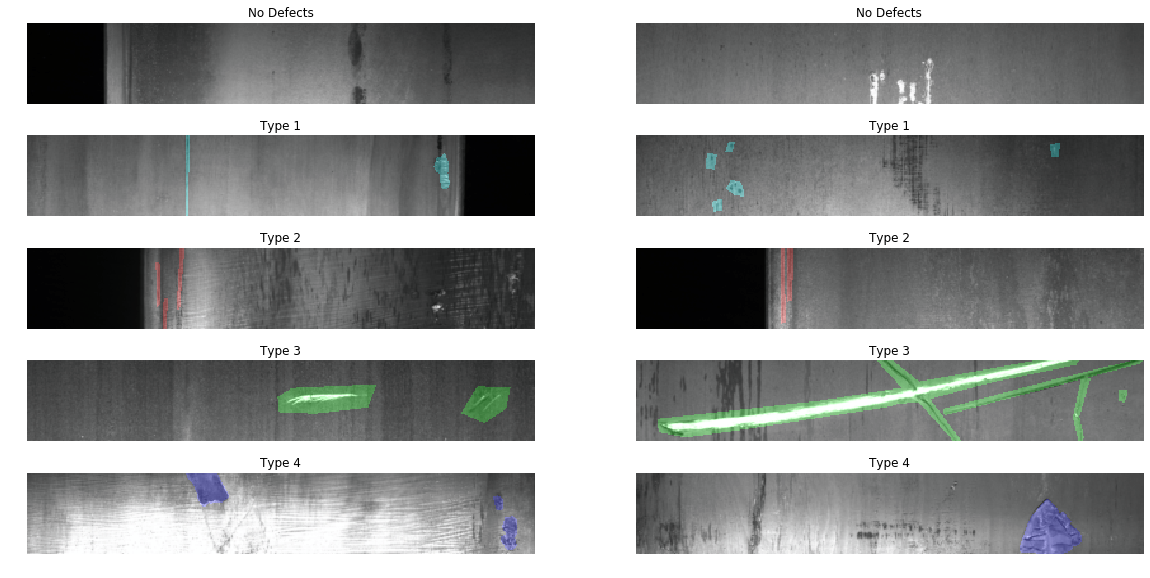

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(20, 10))

for i in range(5):
    for j in range(2):
#         ax[i, j].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
#         ax[i, j].tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
        ax[i, j].axis('off')
for j in range(2):
    plot_img(X0[j], Y0[j], M0[j], ax[0, j])
    ax[0, j].set_title('No Defects')
    plot_img(X1[j], Y1[j], M1[j], ax[1, j])
    ax[1, j].set_title('Type 1')
    plot_img(X2[j], Y2[j], M2[j], ax[2, j])
    ax[2, j].set_title('Type 2')
    plot_img(X3[j], Y3[j], M3[j], ax[3, j])
    ax[3, j].set_title('Type 3')
    plot_img(X4[j], Y4[j], M4[j], ax[4, j])    
    ax[4, j].set_title('Type 4')
plt.show()